## Trabalho Final Estatística

### 1. exploração inicial

#### importando e configurando libs

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
plt.rcParams["figure.figsize"] = (20,20)

#### importando arquivos

In [3]:
base_treino = 'train.csv'
df_train = pd.read_csv(base_treino)
df_train.set_index('id', inplace=True)

In [4]:
for col in df_train.columns:
    if col not in df_test.columns:
        print (col)    

target


#### explorando DataFrame

In [5]:
df_train.head()

,016399044a,023c68873b,0342faceb5,04e7268385,06888ceac9,072b7e8f27,087235d61e,0b846350ef,0e2ab0831c,12eda2d982,...,f013b60e50,f0a0febd35,f1f0984934,f66b98dd69,fbf66c8021,fdf8628ca7,fe0318e273,fe8cdd80ba,ffd1cdcfc1,target
id,,,,,,,,,,,,,,,,,,,,,
0,6447,d19e3b17239b50f7055ea4ea09f15e5a,5372,35812,1,171.464188,14,-0.318226,0.207681,76.302524,...,0.970187,-5.994271,abe90d9881c0790f47e139cf3e915f2f,0.958330,91.778563,1058,1.000501,40.297779,1.740526,0.536383
1,6416,9f40ab30d26568e05668bf85381dc475,5407,36031,1,198.668261,44,6.042920,-7.343764,67.815740,...,0.852381,66.551540,0dc8ab4be161195c1c90488d4d9313b7,0.543291,26.234959,1036,1.000598,6.030759,7.085240,0.426536
2,6322,9d4444651ceac919e4fee3ea44bbf44f,5381,35959,1,215.160189,43,0.287232,0.038272,48.315810,...,0.744513,63.802229,fd687ed31958a22f80e48865e669987e,0.771631,48.960842,1039,0.000571,40.269326,5.315980,0.498649
3,6479,53116e9d726bcf4c0a5136460ce4036f,5299,35847,1,5610.919136,72,0.023388,-0.043669,26.135256,...,0.938092,57.495654,b1d448724055697b94a122878757a54a,0.133395,6.236324,1044,1.000704,29.115058,1.783141,1.013567
4,6425,b7d2fb1493994729b2cadc6716cde91e,5386,36016,1,306.835761,19,-0.722365,0.918951,18.337088,...,1.106354,203.894922,3d80cf3d6e641fe32f4abc1fd522e0bc,0.176264,19.348591,998,1.000581,44.047487,3.219030,4.008763


In [6]:
# explorando df
print (df_train.shape[0], 'linhas\n', df_test.shape[1], 'colunas')

24976 linhas
 106 colunas


In [7]:
#tipos de colunas
df_train.dtypes.value_counts()

float64    69
int64      31
object      7
dtype: int64

#### verificando variável target

In [8]:
#variável target
df_train['target'].describe()
### aqui notamos que a variável target é contínua

count    24976.000000
mean         1.660858
std          2.251265
min         -0.239838
25%          0.503120
50%          0.983784
75%          1.968016
max         61.326129
Name: target, dtype: float64

### 2. transformação inicial

#### separando dataframes em x e y

In [9]:
x_total = df_train.drop(['target'], axis=1)
y_total = df_train['target']

#### realizando separação de dados de treino em treino e teste, para validação

In [10]:
from sklearn.model_selection import train_test_split
x, x_t, y, y_t = train_test_split(x_total, y_total, test_size = 0.33, random_state = 42)

#### verificando correlação em x

<AxesSubplot:>

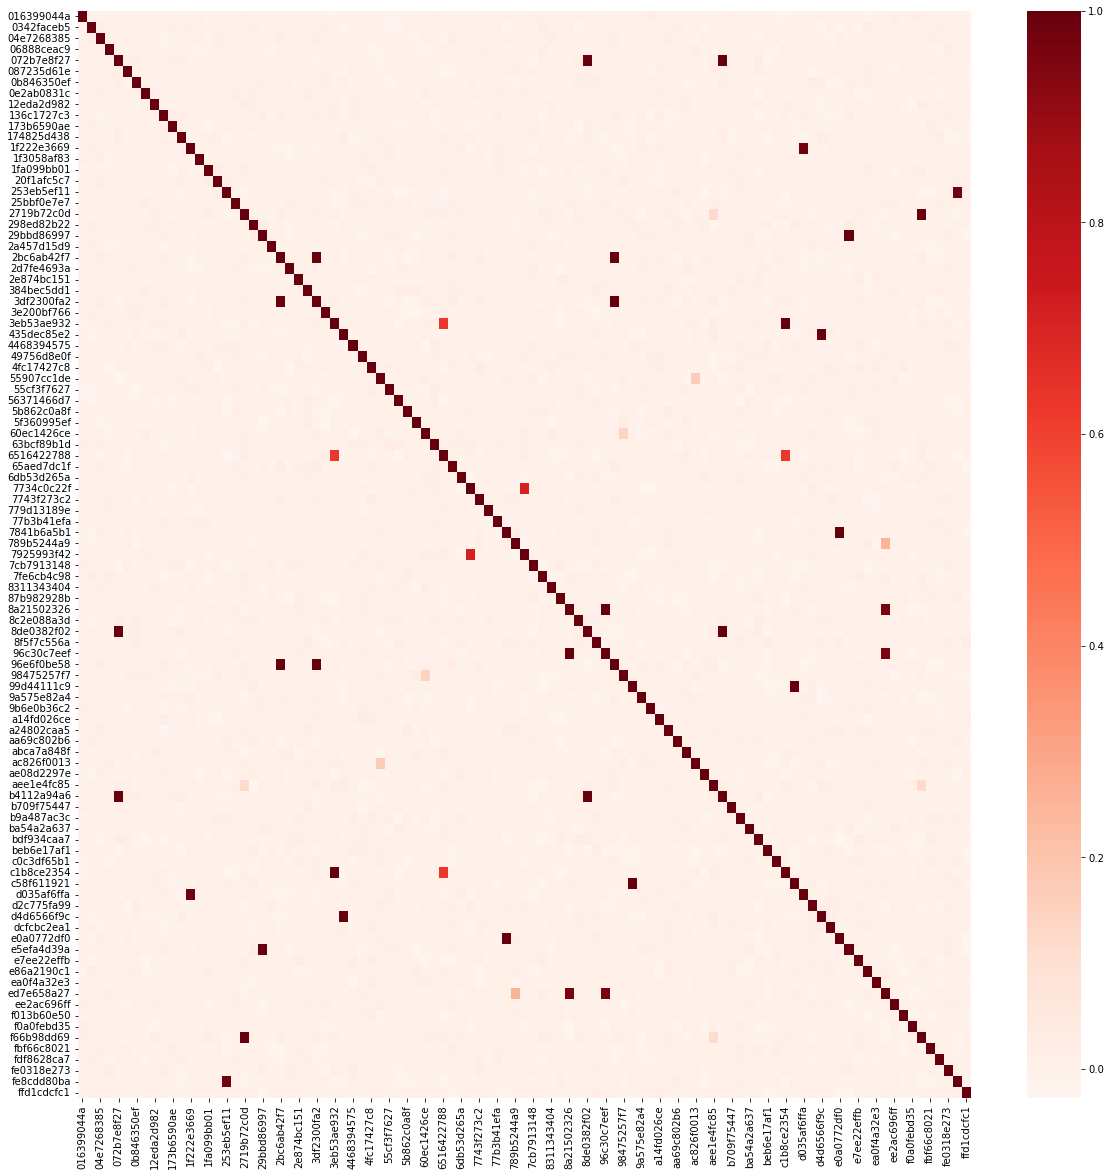

In [11]:
import seaborn as sn
x_corr = x.corr(method='pearson')
sn.heatmap(x_corr, cmap="Reds")

--aqui, verificamos que algumas colunas possuem correlação entre outras.

In [12]:
print ('número de colunas dropadas por correlação')
for i in np.arange(0.5, 1, 0.1):
    mask = (x_corr>i) & (x_corr < 1)
    print (round(i, 1),':', len(x_corr[(mask.sum()>0).sort_values(ascending = False)].index))

número de colunas dropadas por correlação
0.5 : 28
0.6 : 28
0.7 : 27
0.8 : 25
0.9 : 25


C:\Users\diego\AppData\Local\Temp\ipykernel_8732\326783842.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print (round(i, 1),':', len(x_corr[(mask.sum()>0).sort_values(ascending = False)].index))


In [13]:
#obtendo colunas dropadas com correlação 0.5
mask = (x_corr>0.5) & (x_corr < 1)
index_high_corr = x_corr[mask].unstack().dropna().index
cols_alta_correlacao = []
for ind in index_high_corr:
    if ind not in cols_alta_correlacao:
        cols_alta_correlacao.append(ind[0])

#### dropando uma de cada duas colunas com alta correlação

In [14]:
x.drop(columns = cols_alta_correlacao, inplace=True)

### 3. pré-processamento

#### criando dicionário com tipos de colunas

In [15]:
col_types = {}
for col in x:
    try:
        col_types[str(x[col].dtype)].append(col)
    except:
        col_types.update({str(x[col].dtype):[col]})
for col_type in col_types:
    print (col_type)

int64
object
float64


#### removendo outliers em 3 desvios padrão

In [16]:
#criando dataframe apenas com variáveis numéricas
x_num = x[col_types['int64']+col_types['float64']]

#aplicando zscore e removendo outliers
from scipy import stats
x_num = x_num[(np.abs(stats.zscore(x_num)) < 3 ).all(axis=1)]

#obtendo índice das linhas para aplicar no DF original
index_non_outliers = x_num.index
print ('anterior:\t',x.shape[0],'\napós remoção:\t',x_num.shape[0])

#aplicando no dataframe completo
x = x.loc[index_non_outliers]
y = y.loc[index_non_outliers]

anterior:	 16733 
após remoção:	 9855


#### observando colunas categóricas

- Verificando volumetria das colunas
- Entendendo qual é a distribuição dos valores únicos em cada coluna
- Dummerizando as colunas
- Verificando resultado de dummerização

In [17]:
# verificando colunas do tipo objeto (categóricas/string)
lst = []
for col in col_types['object']:
    col_len = x[col].shape[0]
    col_unique_len = pd.unique(x[col]).shape[0]
    col_nan = pd.isnull(x[col]).sum()
    lst.append([col, col_len, col_unique_len, col_nan]) 
obj_df = pd.DataFrame(lst, columns = ['col', 'qtd_linhas', 'qtd_unicos', 'missing'])
obj_df

,col,qtd_linhas,qtd_unicos,missing
0,023c68873b,9855,619,0
1,361f93f4d1,9855,728,0
2,8d0606b150,9855,715,0
3,91145d159d,9855,588,0
4,b835dfe10f,9855,137,0
5,e16e640635,9855,171,0
6,f1f0984934,9855,322,0


#### aqui verifica-se que existem dados repetidos nas colunas, que podem ser úteis para realizar dummerização

In [18]:
# verificamos a quantidade de aparições por string única
valores_unicos = []
for col in col_types['object']:
    uniques = pd.unique(x[col])
    for unique in uniques:
        valores_unicos.append([col, (x[col] == unique).sum()])
dfValoresUnicos = pd.DataFrame(valores_unicos, columns = ['Variable', 'Appearances'])\
                    .sort_values(by='Appearances', axis=0, ascending = False)
dfValoresUnicos

,Variable,Appearances
2687,b835dfe10f,90
2696,b835dfe10f,90
2655,b835dfe10f,88
2751,b835dfe10f,87
2682,b835dfe10f,87
...,...,...
2056,8d0606b150,5
775,361f93f4d1,5
409,023c68873b,5
582,023c68873b,5


### dummerizando e verificando variáveis de importância
- considerando o cenário acima, dummerizamos todas as colunas de tipo 'object'.


In [19]:
# dummerizando
x_2 = pd.get_dummies(data=x)

In [20]:
print ('Treino anterior:',x.shape[1],'colunas\nApós dummerizar', x_2.shape[1],'colunas.')     

Treino anterior: 78 colunas
Após dummerizar 3351 colunas.


#### por conta da quantidade muito grande de colunas geradas, seguiremos apenas com as colunas numéricas

In [21]:
x_2 = x.drop(col_types['object'], axis=1)
print('Quantidade de colunas no dataframe final:',x_2.shape[1])

Quantidade de colunas no dataset final: 71


#### realizando z-score normalization em todas as variáveis

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
x_z = pd.DataFrame(sc.fit_transform(X=x_2))
x_z.columns = x_2.columns
x_z

,016399044a,0342faceb5,04e7268385,06888ceac9,087235d61e,0b846350ef,0e2ab0831c,12eda2d982,136c1727c3,173b6590ae,...,e7ee22effb,e86a2190c1,ea0f4a32e3,ee2ac696ff,f013b60e50,f0a0febd35,fbf66c8021,fdf8628ca7,fe0318e273,ffd1cdcfc1
0,-0.921633,0.218741,-2.123542,0.403184,-0.465997,0.062908,0.013875,0.191677,-0.967998,0.125898,...,0.619134,0.927377,0.354222,0.191677,-0.863681,-0.636843,0.830311,1.219458,0.842687,-1.185216
1,-0.604878,-0.284138,0.486177,0.403184,0.605305,0.044062,1.721347,0.749072,-0.451210,-1.920550,...,-0.956485,1.337418,0.524191,0.749072,0.981302,1.113549,1.786337,-0.797238,0.233503,0.012666
2,-2.391375,1.328035,-2.096693,0.403184,1.125652,0.075150,0.193155,1.184730,-0.110929,-2.565915,...,0.234837,0.131061,0.658662,1.184730,-1.021667,-1.370759,-0.333430,1.017789,-0.630161,0.950386
3,-1.149696,-0.210185,-1.291224,0.403184,-0.833300,0.039981,0.075426,-1.956922,-0.364602,-0.773333,...,1.118721,1.123790,-0.598034,-1.956922,0.163180,-0.247018,-2.631288,-0.225841,-1.678271,1.481682
4,0.560780,0.026464,-0.743505,0.403184,0.880783,-0.007650,0.548428,-0.127450,-0.804963,0.586669,...,-0.418469,-0.604687,0.553942,-0.127450,0.573149,-0.061912,-0.689868,-0.158617,-0.128159,-0.090578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,1.143609,-0.727855,0.555985,0.403184,1.003218,-0.026519,-0.006528,-0.837386,0.316554,-0.945335,...,2.886489,0.418919,-0.228791,-0.837386,-1.054863,-1.552070,0.356734,0.278333,-1.642117,-0.646597
9851,0.421408,-0.165814,0.555985,0.403184,-0.129302,-0.044370,-0.387269,-1.115593,-0.750910,1.301965,...,-0.841196,-1.383996,1.073748,-1.115593,-0.670674,1.318359,0.779435,-0.360287,-0.262430,-0.419279
9852,0.586120,0.913899,-0.254854,-2.480256,0.054350,-0.721780,-0.000276,1.116629,0.286199,-0.875079,...,-0.764337,1.281450,-0.654744,1.116629,0.808636,2.001184,-0.927262,-2.343372,0.012334,-0.395730
9853,0.383397,-0.432044,1.339974,0.403184,-0.863909,-0.079783,-0.941087,1.478860,3.109828,0.054629,...,-0.610618,0.362811,0.274097,1.478860,-1.056356,-1.021099,0.306316,-0.629180,0.936521,-1.191823


### 4.Selecionando variáveis mais importantes
- Realizando seleção de features com RandomForest

In [24]:
# imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [25]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_z, y)

RandomForestRegressor()

#### demonstrando colunas com feature importances

In [26]:
rf.feature_importances_
x_z.shape

(9855, 71)

In [27]:
df_fi = [x_z.columns,rf.feature_importances_]
df_fi = pd.DataFrame(df_fi)\
                    .transpose()
df_fi.columns = ['col', 'feature_importance']
df_fi.set_index('col', inplace=True)
df_fi.sort_values(by=['feature_importance'], axis=0, ascending = False, inplace=True)
lst_col_importance = df_fi.index.values
df_fi

,feature_importance
col,
e86a2190c1,0.048244
aee1e4fc85,0.046044
6db53d265a,0.037055
2d7fe4693a,0.034805
ea0f4a32e3,0.032444
...,...
63bcf89b1d,0.006141
55cf3f7627,0.004979
7cb7913148,0.004269


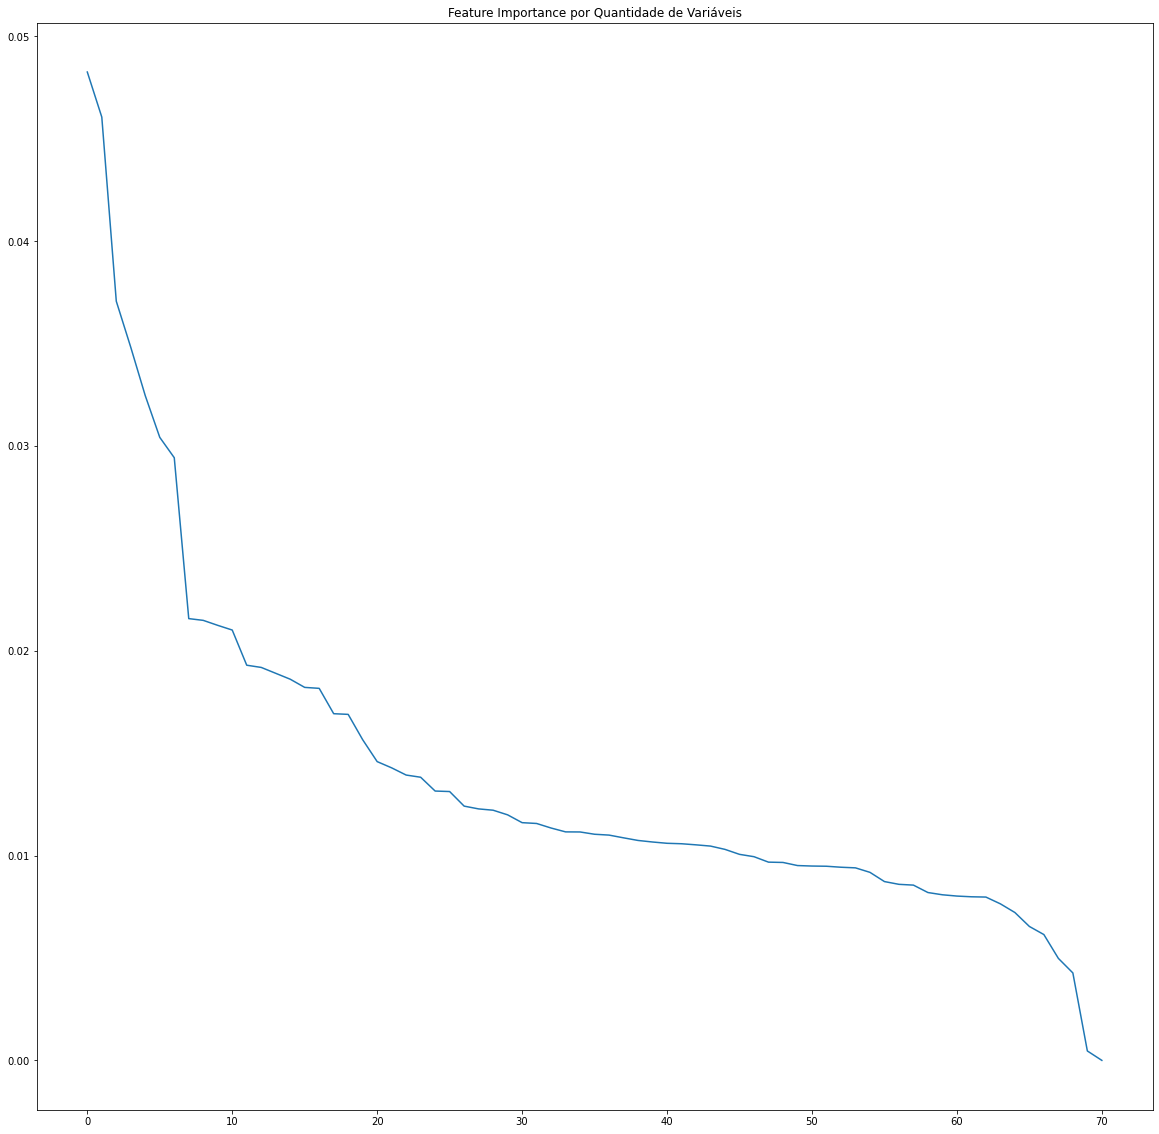

In [59]:
#plottando importâncias
df_fi['var_qtd'] = np.arange(len(df_fi))
plt.title('Feature Importance por Quantidade de Variáveis')
plt.plot(df_fi['var_qtd'], df_fi['feature_importance'])

### 5. treino e teste de modelo linear e decisionTree
- adaptando dataframe de teste com as transformações realizadas no treino
- realizando fit dos modelos com um número crescente de variáveis
- testando e obtendo melhor modelo r a melhor quantidade de variáveis

In [29]:
#adaptando dataframe de teste
x_t = x_t.drop(cols_alta_correlacao, axis=1) #alta correlação
x_t = x_t.drop(col_types['object'], axis=1) #tipo object
x_t_z = pd.DataFrame(sc.fit_transform(X=x_t)) #normalizando em z
x_t_z.columns = x_t.columns #apropriando nomes de colunas
x_t_z.shape



(8243, 71)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
from sklearn.metrics import r2_score

In [34]:
ml_df = []
for i in range (1, len(lst_col_importance)+1):
    lr.fit(x_z[lst_col_importance[0:i]], y)
    y_pred_lr = lr.predict(x_t_z[lst_col_importance[0:i]])
    dt.fit(x_z[lst_col_importance[0:i]],y)
    y_pred_dt = dt.predict(x_t_z[lst_col_importance[0:i]])
    ml_df.append([i, r2_score(y_t, y_pred_lr), r2_score(y_t, y_pred_dt)])
ml_df = pd.DataFrame(ml_df, columns = ['qtd_features', 'r2_Linear', 'r2_DecisionTree']).set_index('qtd_features')

In [37]:
ml_df.sort_values(['r2_Linear', 'r2_DecisionTree'], ascending = False)

,r2_Linear,r2_DecisionTree
qtd_features,,
40,1.332789e-01,-0.502009
43,1.332620e-01,-0.466037
41,1.332293e-01,-0.504743
42,1.332289e-01,-0.528895
45,1.330887e-01,-0.513007
...,...,...
67,-2.802553e+12,-0.632483
69,-3.560552e+15,-0.650011
71,-3.563011e+15,-0.568372


#### verifica-se que o melhor modelo é o r2_Linear, quando plottado com as 40 features que melhor explicam y

In [40]:
lr.fit(x_z[lst_col_importance[0:40]], y)
y_pred_lr = lr.predict(x_t_z[lst_col_importance[0:40]])
print('score:',r2_score(y_t, y_pred_lr))


score: 0.13327893392463053


#### O score obtido é baixo, o que denota que o modelo não tem boa capacidade de prever a variável dependente. É possível que isso ocorra pelo fato do dataset original ser aleatório.

### 6. escrevendo arquivo final


In [44]:
#importando teste final
base_teste = 'test.csv'
df_test = pd.read_csv(base_teste)
df_test.set_index('id', inplace=True)

In [45]:
#adaptando dataframe final
x_t_f = df_test.drop(cols_alta_correlacao, axis=1) #alta correlação
x_t_f = x_t_f.drop(col_types['object'], axis=1) #tipo object
x_t_f_z = pd.DataFrame(sc.fit_transform(X=x_t_f)) #normalizando em z
x_t_f_z.columns = x_t_f.columns #apropriando nomes de colunas
x_t_f_z.shape

(24976, 71)

In [47]:
y_pred_teste_final = lr.predict(x_t_f_z[lst_col_importance[0:40]])
y_pred_teste_final

array([1.78999204, 1.45403296, 1.40502057, ..., 2.31903052, 2.00139264,
       1.49343677])

In [48]:
df_entrega = df_test
df_entrega['target']=y_pred_teste_final

In [50]:
df_entrega.to_csv('entrega.csv')

### Alunos
- Andrey Ferreira de Almeida - RM: 344545
- Diego Cohen - RM 344154
- Vitor Silva - RM 344669